In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [30]:
# Load the dataset
df = pd.read_csv('D:\Machine Learning\Predictive_Modeling\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\abdul\AppData\Local\Temp\ipykernel_8900\4203426760.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\Machine Learning\Predictive_Modeling\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


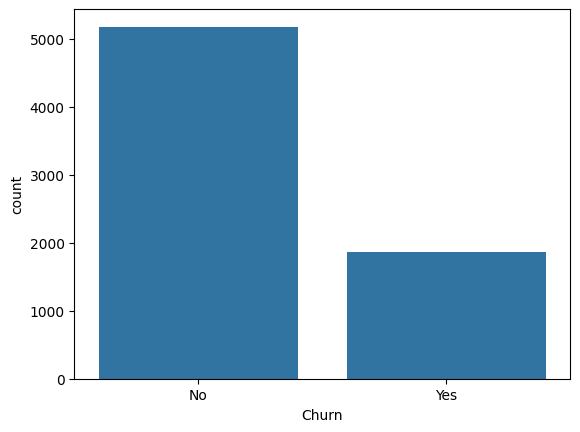

In [32]:

print(df.info())

# Summary statistics
print(df.describe())

# Check the distribution of the target variable (Churn)
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.show()

In [35]:
# Label encoding for binary categorical columns
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes -> 1, No -> 0

# One-hot encoding for other categorical columns
df = pd.get_dummies(df, drop_first=True)

In [39]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=13602)

In [40]:
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges_999.9']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [41]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))